<a href="https://colab.research.google.com/github/khaeljonathan/fi1101-09-2023-1/blob/main/Tugas%201%20Rispas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/KONSUMSI BBM - Sheet1.csv")

# Mengubah kolom 'Tahun' menjadi format datetime dengan hanya tahun
df['Tahun'] = pd.to_datetime(df['Tahun'], format='%Y')


df.head()

,Tahun,Total Konsumsi BBM
0,2009-01-01,61039372
1,2010-01-01,63379422
2,2011-01-01,65678326
3,2012-01-01,72290008
4,2013-01-01,72034024


In [ ]:
df.tail()

,Tahun,Total Konsumsi BBM
10,2019-01-01,74444861
11,2020-01-01,65724990
12,2021-01-01,70237358
13,2022-01-01,77955016
14,2023-01-01,80391543


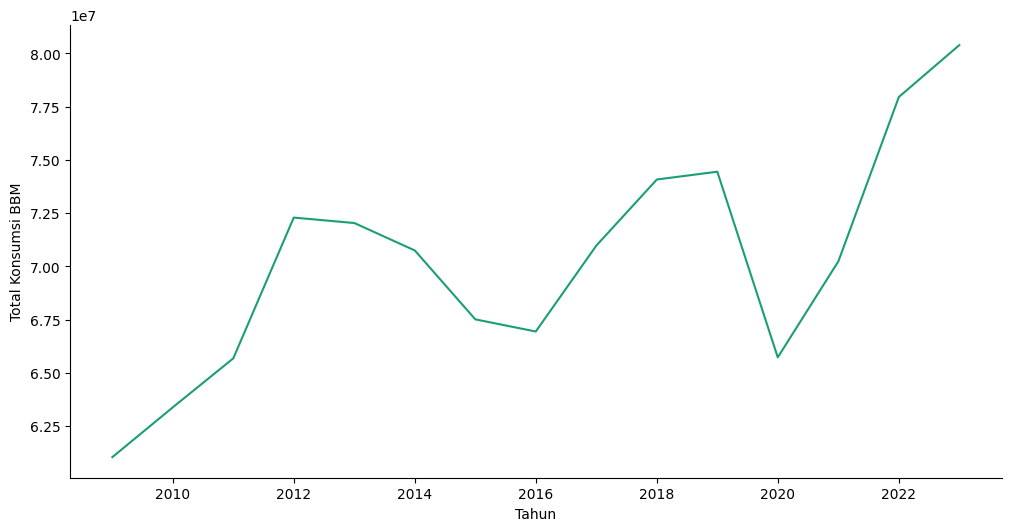

In [ ]:
# @title Tahun vs Total Konsumsi BBM

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Total Konsumsi BBM']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Total Konsumsi BBM')

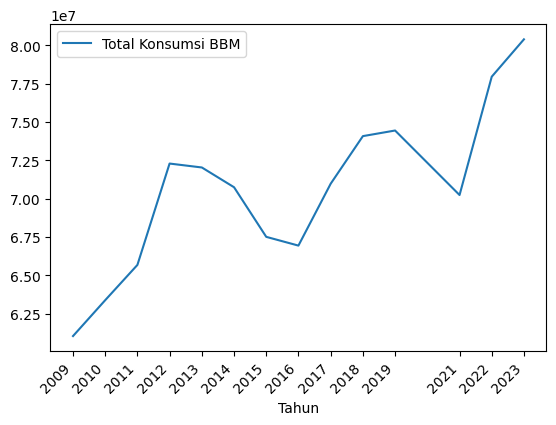

In [ ]:

# Menghapus data untuk tahun 2020
df_filtered = df[df['Tahun'].dt.year != 2020]

# Membuat plot dengan data yang sudah difilter
ax = df_filtered.plot(x='Tahun', y='Total Konsumsi BBM')

# Menyesuaikan tampilan sumbu x agar tahun ditampilkan dengan rotasi 45 derajat
ax.set_xticks(df_filtered['Tahun'])
ax.set_xticklabels(df_filtered['Tahun'].dt.year, rotation=45)

# Menampilkan plot
plt.show()

In [ ]:
train_year = 2017
df_train = df_filtered[df_filtered['Tahun'].dt.year < train_year].copy()
df_test = df_filtered[df_filtered['Tahun'].dt.year >= train_year].copy()

In [ ]:
df_train.head()


,Tahun,Total Konsumsi BBM
0,2009-01-01,61039372
1,2010-01-01,63379422
2,2011-01-01,65678326
3,2012-01-01,72290008
4,2013-01-01,72034024


In [ ]:
df_test.head()

,Tahun,Total Konsumsi BBM
8,2017-01-01,70977143
9,2018-01-01,74079096
10,2019-01-01,74444861
12,2021-01-01,70237358
13,2022-01-01,77955016


Cek untuk Stationary Time Series

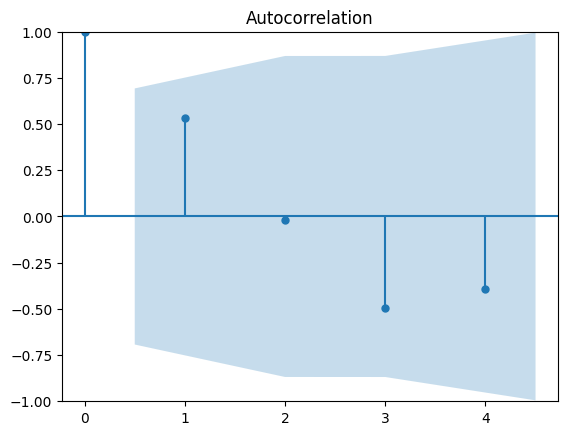

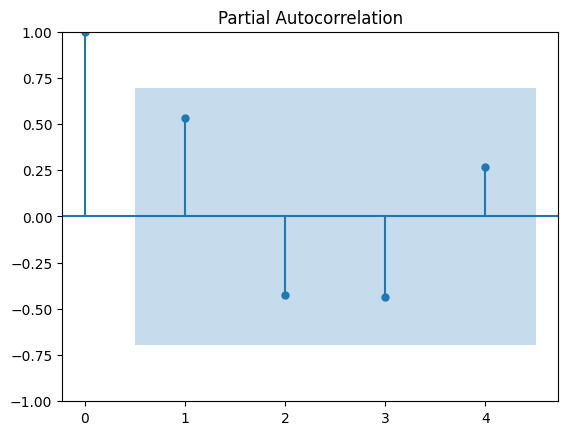

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memilih kolom numerik dari df_train, misalnya 'Total Konsumsi BBM'
df_train_numerical = df_train['Total Konsumsi BBM']

# Plotting ACF dan PACF
acf_original = plot_acf(df_train_numerical)
pacf_original = plot_pacf(df_train_numerical)


Artinya ini udah stationary, bisa lanjut

Tentuin parameter p,d,q (2,0,0)

In [ ]:
# Memastikan kolom yang digunakan adalah numerik
df_train['Total Konsumsi BBM'] = pd.to_numeric(df_train['Total Konsumsi BBM'], errors='coerce')

# Memastikan tidak ada nilai NaN yang tersisa setelah konversi
df_train = df_train.dropna()

# Membuat model ARIMA lagi
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train['Total Konsumsi BBM'], order=(2, 0, 0))
model_fit = model.fit()

# Menampilkan hasil ringkasan model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:     Total Konsumsi BBM   No. Observations:                    8
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -129.285
Date:                Mon, 17 Mar 2025   AIC                            266.571
Time:                        05:57:17   BIC                            266.888
Sample:                             0   HQIC                           264.428
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.745e+07   1.39e+06     48.488      0.000    6.47e+07    7.02e+07
ar.L1          1.0737      0.325      3.307      0.001       0.437       1.710
ar.L2         -0.5984      0.223     -2.682      0.0

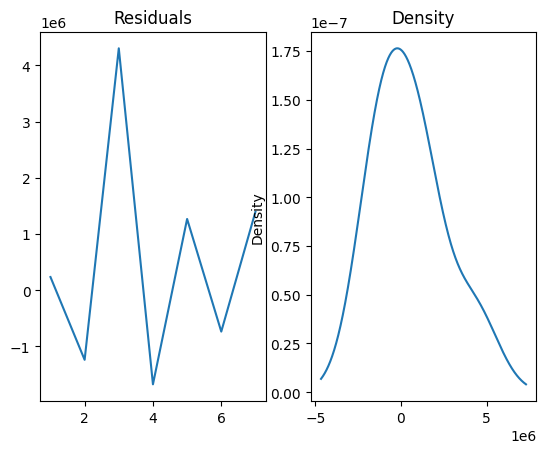

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Prediksi pada data testing
# Asumsi df_test adalah data testing yang sudah ada
predictions = model_fit.forecast(steps=len(df_test))

# Membandingkan dengan nilai aktual di data testing
actual_values = df_test['Total Konsumsi BBM'].values

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

# Menampilkan MAPE
print(f'MAPE: {mape:.2f}%')

# Atau menggunakan library sklearn untuk menghitung MAPE
mape_sklearn = mean_absolute_percentage_error(actual_values, predictions)
print(f'MAPE (sklearn): {mape_sklearn * 100:.2f}%')


MAPE: 9.57%
MAPE (sklearn): 9.57%


In [ ]:
print(df_train.head())


       Tahun  Total Konsumsi BBM
0 2009-01-01            61039372
1 2010-01-01            63379422
2 2011-01-01            65678326
3 2012-01-01            72290008
4 2013-01-01            72034024


In [ ]:
print(forecast_value)

8     6.686662e+07
9     6.713033e+07
10    6.745686e+07
11    6.764966e+07
12    6.766126e+07
13    6.755835e+07
14    6.744090e+07
15    6.737637e+07
16    6.737738e+07
17    6.741707e+07
18    6.745909e+07
19    6.748046e+07
20    6.747825e+07
21    6.746309e+07
22    6.744814e+07
23    6.744116e+07
24    6.744261e+07
25    6.744834e+07
26    6.745363e+07
27    6.745588e+07
28    6.745513e+07
29    6.745298e+07
30    6.745111e+07
31    6.745040e+07
32    6.745075e+07
33    6.745156e+07
34    6.745221e+07
35    6.745243e+07
36    6.745227e+07
37    6.745198e+07
38    6.745175e+07
39    6.745168e+07
40    6.745175e+07
41    6.745186e+07
42    6.745194e+07
43    6.745196e+07
44    6.745193e+07
45    6.745189e+07
46    6.745186e+07
47    6.745186e+07
48    6.745187e+07
49    6.745188e+07
50    6.745189e+07
51    6.745189e+07
52    6.745189e+07
53    6.745188e+07
54    6.745188e+07
55    6.745188e+07
56    6.745188e+07
57    6.745188e+07
58    6.745188e+07
Name: predicted_mean, dtype: fl

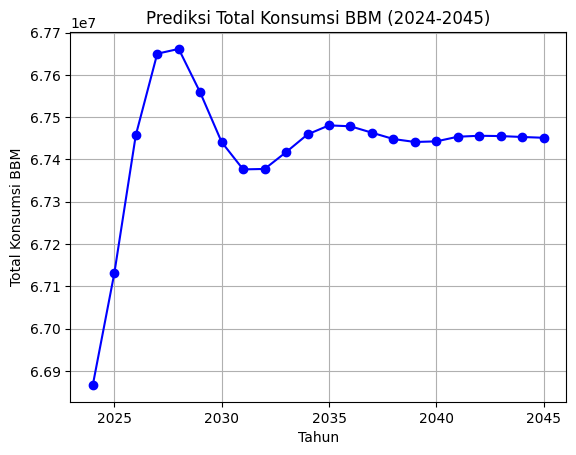

In [ ]:
import pandas as pd
import numpy as np

# Prediksi nilai
forecast_values = [6.686662e+07, 6.713033e+07, 6.745686e+07, 6.764996e+07, 6.766126e+07,
                   6.755835e+07, 6.744090e+07, 6.737637e+07, 6.737738e+07, 6.741707e+07,
                   6.745909e+07, 6.748046e+07, 6.747827e+07, 6.746309e+07, 6.744816e+07,
                   6.744116e+07, 6.744262e+07, 6.745363e+07, 6.745588e+07, 6.745513e+07, 6.745298e+07, 6.745111e+07]

# Membuat indeks untuk tahun 2024 hingga 2045
forecast_years = np.arange(2024, 2024 + 22)

# Membuat DataFrame untuk hasil prediksi
forecast_df = pd.DataFrame(forecast_values, index=forecast_years, columns=['Predicted Total Konsumsi BBM'])

# Plot hasil prediksi
import matplotlib.pyplot as plt
plt.plot(forecast_df.index, forecast_df['Predicted Total Konsumsi BBM'], marker='o', color='blue')
plt.title('Prediksi Total Konsumsi BBM (2024-2045)')
plt.xlabel('Tahun')
plt.ylabel('Total Konsumsi BBM')
plt.grid(True)
plt.show()

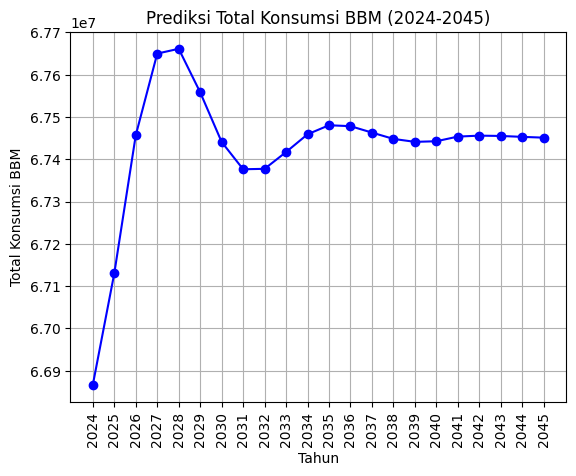

In [ ]:
import matplotlib.pyplot as plt

# Plot hasil prediksi dengan garis lurus
plt.plot(forecast_df.index, forecast_df['Predicted Total Konsumsi BBM'], marker='o', color='blue', linestyle='-')

# Memberikan judul dan label
plt.title('Prediksi Total Konsumsi BBM (2024-2045)')
plt.xlabel('Tahun')
plt.ylabel('Total Konsumsi BBM')

# Mengatur ticks sumbu X agar hanya menampilkan tahun tanpa desimal dan memutarnya vertikal
plt.xticks(forecast_df.index, labels=forecast_df.index.astype(int), rotation=90)

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.show()



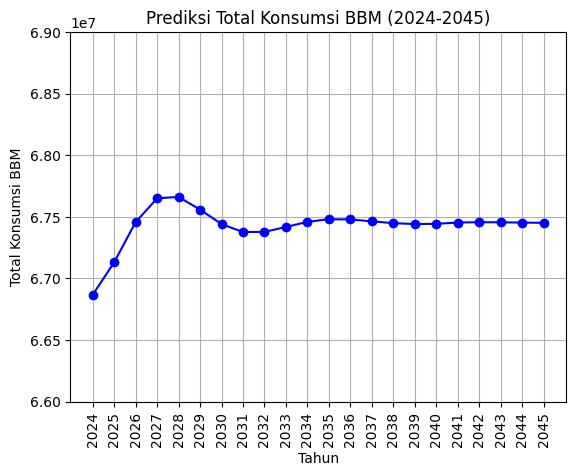

In [ ]:
# Plot hasil prediksi dengan garis lurus
plt.plot(forecast_df.index, forecast_df['Predicted Total Konsumsi BBM'], marker='o', color='blue', linestyle='-')

# Memberikan judul dan label
plt.title('Prediksi Total Konsumsi BBM (2024-2045)')
plt.xlabel('Tahun')
plt.ylabel('Total Konsumsi BBM')

# Mengatur ticks sumbu X agar hanya menampilkan tahun tanpa desimal dan memutarnya vertikal
plt.xticks(forecast_df.index, labels=forecast_df.index.astype(int), rotation=90)

# Menetapkan rentang sumbu Y dari 5 hingga 7 juta
plt.ylim(6.6e7, 6.9e7)  # Rentang 5e7 = 50 juta, 7e7 = 70 juta

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.show()
